In [39]:
import pickle
from itertools import product
from statistics import mean, variance

In [25]:
contexts = ['simple', 'medium', 'complex']
commands = ['simple', 'medium', 'ambiguous']

trials = list(product(contexts, commands))

def parse_results(trial):
    responses = []
    trial = f'{trial[0]}_{trial[1]}'

    with open(f'./pickles/{trial}.pkl', 'rb') as f:
        while True:
            try:
                responses.append(pickle.load(f))
            except EOFError:
                break

    return responses

def dump_results(trial):
    r = parse_results(trial)
    
    with open(f'./markdown/{trial}.md', 'w') as f:
        for i, ln in enumerate(r):
            f.write(f'# {i}\n\n')
            f.write(ln.n)

In [57]:
for trial in trials:
    dump_results(trial)

In [53]:
def parse_time_results(trial):
    ts = []
    trial = f'{trial[0]}_{trial[1]}'

    with open(f'./pickles/{trial}_t.pkl', 'rb') as f:
        while True:
            try:
                ts.append(pickle.load(f))
            except EOFError:
                break

    return ts[-10:]

times = {}

for trial in trials:
    results = parse_time_results(trial)
    # times[trial] = (mean(results), min(results), max(results), variance(results))
    times[trial] = results


for k, v in times.items():
    print(f'{k}: {mean(v)} {min(v)} {max(v)} {variance(v)}')

('simple', 'simple'): 23.712513833400003 14.082197375000021 45.976859790999995 78.72022487348734
('simple', 'medium'): 28.0679685917 15.163768333999997 65.78360083299998 291.34815905121235
('simple', 'ambiguous'): 34.01800099600001 15.03762641700007 88.325560666 601.2921622061021
('medium', 'simple'): 21.233151475100023 17.60596062500008 30.09781637499964 10.862286754880753
('medium', 'medium'): 23.172843470800125 22.31898345799982 24.2394054589995 0.42693428434102737
('medium', 'ambiguous'): 22.651793745899795 17.97393566699975 26.87344587500047 9.336656590646712
('complex', 'simple'): 37.95535872079999 23.288524249999682 141.3339273750007 1325.9693914439767
('complex', 'medium'): 33.202823454300415 26.77418949999992 54.141003958999136 63.89937948256032
('complex', 'ambiguous'): 30.119902175099924 26.238345750000008 32.06110029199954 4.2235093988188535


{'whiskers': [<matplotlib.lines.Line2D at 0x106b539d0>,
 'caps': [<matplotlib.lines.Line2D at 0x106b53df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x106b53730>,
 'medians': [<matplotlib.lines.Line2D at 0x106b69370>,
 'fliers': [<matplotlib.lines.Line2D at 0x106b69610>,
 'means': []}

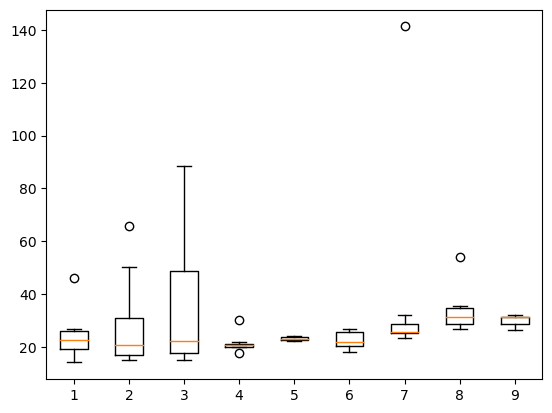

In [56]:
import matplotlib.pyplot as plt
 
plt.boxplot([times[k] for k in list(times.keys())])